In [1]:
%load_ext autotime

time: 290 µs (started: 2021-04-30 17:07:47 +08:00)


In [2]:
from typing import List

from rng import RNG
import numpy as np
import matplotlib.pyplot as plt

time: 1.45 s (started: 2021-04-30 17:07:48 +08:00)


In [3]:
sequence_length = 10000
rng = RNG(1, 2, 3, 4, 5, 6)
data = []

def seq(n: int) -> List[float]:
    global data
    if sequence_length + n > len(data):
        for _ in range(sequence_length + n - len(data)):
            data.append(next(rng))
    return data[n:sequence_length+n]

time: 679 µs (started: 2021-04-30 17:07:51 +08:00)


# ks test - uniformity

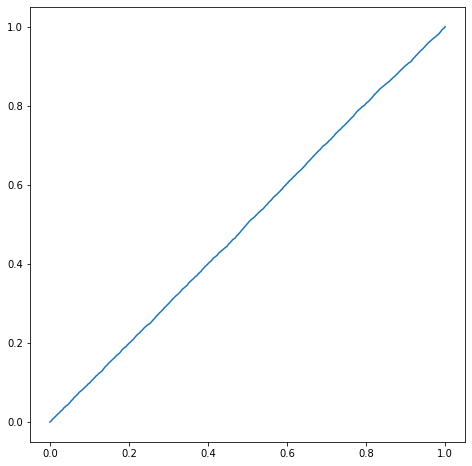

0.008785511770142862

time: 271 ms (started: 2021-04-30 17:08:01 +08:00)


In [4]:
def kstest(seq: List[float]) -> float:
    seq = np.sort(seq)
    delta = 1 / len(seq)
    left_edge = np.arange(0, len(seq)) / len(seq)
    right_edge = delta + left_edge
    max_diff = max(max(abs(seq - left_edge)), max(abs(seq - right_edge)))
    
    # draw
    fig = plt.figure(figsize=(8.0, 8.0))
    ax = fig.add_subplot()
    ax.set_aspect("equal")
    ax.plot(delta/2 + left_edge, seq)
    plt.show()
    
    # return
    return max_diff
    
kstest(seq(0))

# corellation coefficient between two consecutive sequence

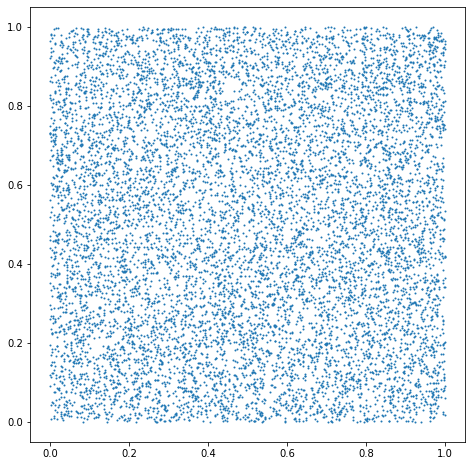

0.008436850889575274

time: 775 ms (started: 2021-04-30 17:08:08 +08:00)


In [5]:
def coef(seq1: List[float], seq2: List[float]) -> float:
    # draw
    fig = plt.figure(figsize=(8.0, 8.0))
    ax = fig.add_subplot()
    ax.set_aspect("equal")
    ax.scatter(seq1, seq2, s=1)
    plt.show()
    # return
    cov = np.cov([seq1, seq2])
    return cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])

coef(seq(0), seq(1))